In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
finanzas1 = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/trabajo_practico_1/tarea_del_nene/tarea_del_nene.csv", encoding= "latin-1")
finanzas1 = finanzas1.drop(columns = ["Employees", "Hqlocation", "Hqaddr", "Hqcity", "Hqstate", "Ceo", "Ceo-title", "Ticker", "Fullname", "Prftchange", "Revchange", "Address", "Website", "Hqzip", "Hqtel", "Assets", "Totshequity"])
finanzas1

,Rank,Title,Sector,Industry,Revenues,Profits
0,1,Walmart,Retailing,General Merchandisers,485873,13643.0
1,2,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),223604,24074.0
2,3,Apple,Technology,"Computers, Office Equipment",215639,45687.0
3,4,Exxon Mobil,Energy,Petroleum Refining,205004,7840.0
4,5,McKesson,Wholesalers,Wholesalers: Health Care,192487,2258.0
...,...,...,...,...,...,...
495,496,Michaels Cos.,Retailing,Specialty Retailers: Other,5197,378.2
496,497,Toll Brothers,Engineering & Construction,Homebuilders,5170,382.1
497,498,Yahoo,Technology,Internet Services and Retailing,5169,-214.3
498,499,Vistra Energy,Energy,Energy,5164,-214.3


___

# 1) ¿Cuáles son los sectores que presentan mayores costos?


In [9]:
costos_del_sector = finanzas1.groupby('Sector')[['Revenues','Profits']].sum()
costos_del_sector['Cost'] = costos_del_sector['Revenues'] - costos_del_sector['Profits']
costos_del_sector = costos_del_sector.reset_index()
costos_del_sector = costos_del_sector.sort_values('Cost', ascending= False)
costos_del_sector

,Sector,Revenues,Profits,Cost
6,Financials,2067607,228461.2,1839145.8
16,Retailing,1383281,46613.9,1336667.1
9,Health Care,1318389,105383.9,1213005.1
4,Energy,1176417,370.6,1176046.4
17,Technology,1257589,177901.4,1079687.6
20,Wholesalers,799416,11347.1,788068.9
18,Telecommunications,459978,41272.8,418705.2
8,"Food, Beverages & Tobacco",472806,56308.4,416497.6
12,Industrials,418359,32826.1,385532.9
7,Food & Drug Stores,389686,8522.0,381164.0


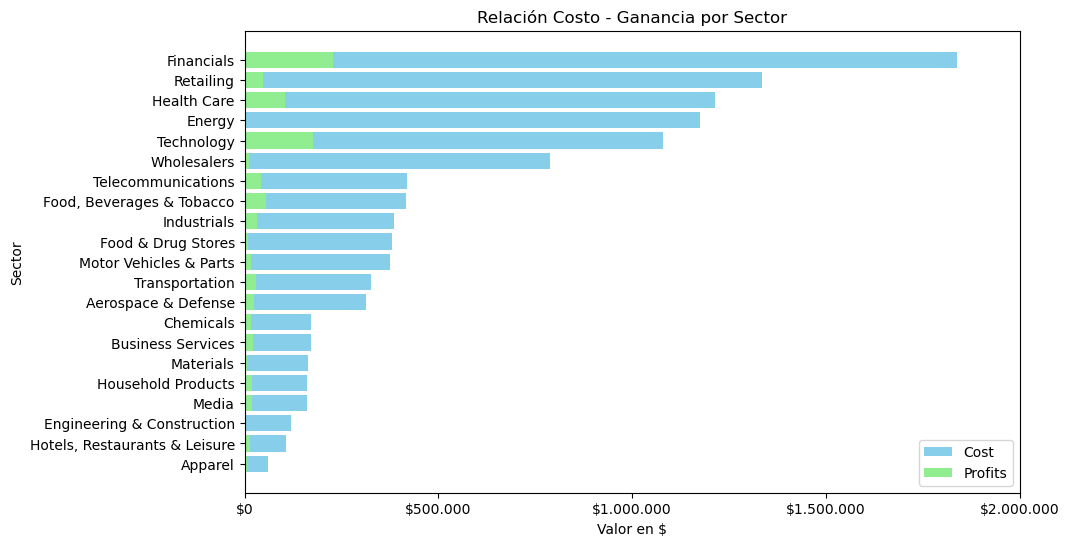

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(costos_del_sector['Sector'], costos_del_sector['Cost'], color='skyblue', label='Cost')
plt.barh(costos_del_sector['Sector'], costos_del_sector['Profits'], color='lightgreen', label='Profits')
plt.xlabel('Valor en $')
plt.ylabel('Sector')
plt.title('Relación Costo - Ganancia por Sector')
plt.gca().invert_yaxis()
x_ticks = [0, 500000, 1000000, 1500000, 2000000]
x_labels = ['$0', '$500.000', '$1.000.000', '$1.500.000', '$2.000.000']
plt.xticks(x_ticks, x_labels)
plt.legend()
plt.show()

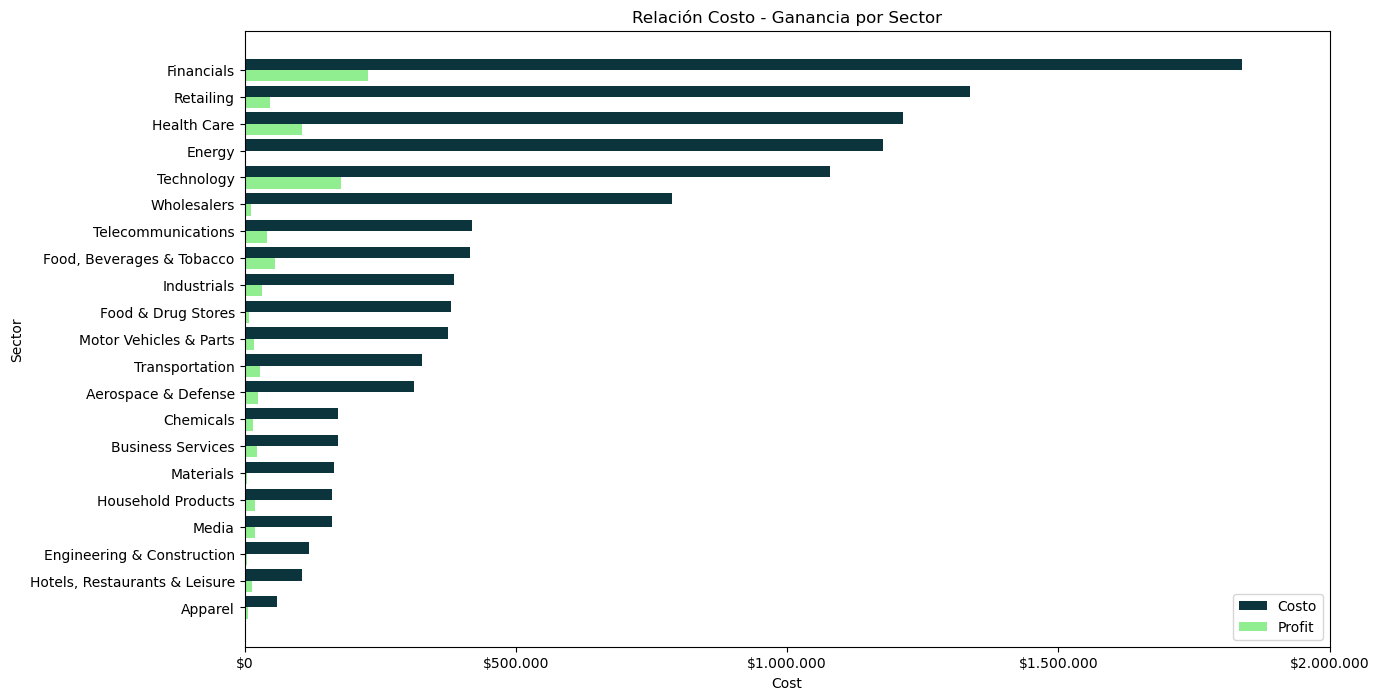

In [11]:
plt.figure(figsize=(14, 8))
bar_width = 0.42
index = np.arange(len(costos_del_sector))
plt.barh(index, costos_del_sector['Cost'], bar_width, color='#0C343D', label='Costo')
plt.barh(index + bar_width, costos_del_sector['Profits'], bar_width, color='lightgreen', label='Profit')
plt.xlabel('Cost')
plt.ylabel('Sector')
plt.title('Relación Costo - Ganancia por Sector')
plt.yticks(index + bar_width / 2, costos_del_sector['Sector'])
plt.gca().invert_yaxis()
x_ticks = [0, 500000, 1000000, 1500000, 2000000]
x_labels = ['$0', '$500.000', '$1.000.000', '$1.500.000', '$2.000.000']
plt.xticks(x_ticks, x_labels)
plt.legend()
plt.show()

___

    ➢ Conclusión:

    A pesar de tener costos significativos, el sector 'Financials' parece ser muy eficiente en la generación de ganancias. Esto puede deberse a que las instituciones financieras pueden tener una amplia gama de fuentes de ingresos, como inversiones, préstamos y servicios financieros.

    La baja rentabilidad en el sector 'Energy' a pesar de sus altos costos podría sugerir que algunas empresas en este sector, particularmente aquellas con participación pública o bajo control gubernamental, pueden tener prioridades diferentes a las ganancias, como el suministro de servicios energéticos asequibles.

___

    ➢ Con respecto a esta pregunta, pudimos notar 2 tipos de sesgos:

    1) Sesgo de selección: Si los datos se obtienen de manera selectiva o si se excluyen ciertos sectores o empresas de manera intencional o accidental, esto podría sesgar los resultados y llevar a conclusiones incorrectas.
    
    2) Sesgo temporal: Los datos financieros pueden estar sujetos a fluctuaciones estacionales o económicas a lo largo del tiempo. Si el período de tiempo seleccionado no es representativo o si se elige estratégicamente para resaltar un rendimiento particular de un sector, podría introducir un sesgo temporal.